<a href="https://colab.research.google.com/github/madonnaojorin/MAT494/blob/main/1.2_Elements_of_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python for Linear Algebra
The main package for linear algebra in Python is the SciPy subpackage scipy.linalg which builds on NumPy. <br>
Import both packages:

In [1]:
import numpy as np
import scipy.linalg as la

### Numpy Arrays
We first briefly go over the basic of numpy arrays.

In [ ]:
a = np.array([1,3,-2,1])  # Creating a 1D Numpy array
print(a)

[ 1  3 -2  1]


In [ ]:
print(a.ndim)   # Dimension of array a

1


In [ ]:
print(a.shape)  # Shape of array a. In this case only the length is shown because it is a 1D array 

In [ ]:
print(a.size)   # Size or number of elements of array a 

In [ ]:
b = np.array([[1,2],[3,7],[-1,5]])   # 2D Numpy array (matrix)
print(b)

[[ 1  2]
 [ 3  7]
 [-1  5]]


In [ ]:
print(b.ndim)   # Dimension of matix b

In [ ]:
print(b.shape)  # Shape of matrix b

In [ ]:
print(b.size)    # Size or number of elements of matrix b

In [ ]:
col = b[:,0]    # Selecting the first column of matrix b
print(col)

[ 1  3 -1]


##1.2.1 Linear Spaces


###1.2.1.1 Linear Combinations

A linear combination is an expression constructed from a subset by multiplying each term by a constant and adding the results. We begin with the concept of a linear subspace.

####Definition 1.2.1 (Linear subspace)<br>
A linear subspace of $V$ is a subset $U\subset V$ that is closed under vector addition and scalar multiplication. That is, for all $\textbf{u}_1,\textbf{u}_2\in U$ and $\alpha \in \mathbb{R}$, it holds that $$\textbf{u}_1+\textbf{u}_2\in U\hspace{3mm} \text{and}\hspace{3mm} \alpha \textbf{u}_1\in U.$$<br>
In particular, $\textbf{0}$ is always in a linear subspace. We now introduce the concept of span.

In [ ]:
u1 = np.array([1,2])
u2 = np.array([3,4])
print(u1+u2,'is also in U')
alpha = 2
print(alpha*u1, 'is also in U')

[4 6] is also in U
[2 4] is also in U


####Definition 1.2.2 (Span)<br>
Let $\textbf{w}_1,\cdots,\textbf{w}_m\in V$. The span of $\{\textbf{w}_1,\cdots,\textbf{w}_m\}$, denoted $\text{span}(\textbf{w}_1,\cdots,\textbf{w}_m)$, is the set of all linear combinations of the $\textbf{w}_j$’s. That is,
$$\text{span}(\textbf{w}_1,\cdots,\textbf{w}_m)=\left\{\sum_{j=1}^m\alpha_j\textbf{w}_j:\alpha_1,\cdots,\alpha_m\in\mathbb{R}\right\}.$$

####Lemma 1.2.3 (Every Span is a Linear Subspace)<br>
Let $W=\text{span}(\textbf{w}_1,\cdots,\textbf{w}_m)$. Then $W$ is a linear subspace.

Proof:<br>
To show that $W$ is a linear subspace, we need to show that $\alpha \textbf{u}_1+\textbf{u}_2\in W$ for $\textbf{u}_1,\textbf{u}_2\in W$ and $\alpha\in\mathbb{R}$. Then
$$\textbf{u}_1=\sum_{j=1}^m\beta_{1,j}\textbf{w}_j\hspace{3mm}\text{and}\hspace{3mm}\textbf{u}_2=\sum_{j=1}^m\beta_{2,j}\textbf{w}_j$$ 
and
$$\alpha \textbf{u}_1+\textbf{u}_2=\alpha\sum_{j=1}^m\beta_{1,j}\textbf{w}_j+\sum_{j=1}^m\beta_{2,j}\textbf{w}_j=\sum_{j=1}^m(\alpha\beta_{1,j}+\beta_{2,j})\textbf{w}_j.$$
Since $\alpha\beta_{1,j}+\beta_{2,j}\in\mathbb{R}$, $\sum_{j=1}^m(\alpha\beta_{1,j}+\beta_{2,j})\textbf{w}_j \in W$.<br>
Therefore, $\alpha \textbf{u}_1+\textbf{u}_2\in W$. $\square$


Example: Let $u_1=[1,2], u_2=[3,4]$, then $2u_1+u_2$ is in $W$.<br>
\begin{equation}
u_1=w_1+2w_2\\
u_2=3w_1+4w_2\\
2u_1+u_2=2(w_1+2w_2)+3w_1+4w_2=5w_1+8w_2\in W
\end{equation}


####Definition 1.2.4 (Column space)<br>
Let $\textbf{A}\in \mathbb{R}^{n\times m}$ be an $n\times m$ matrix with columns $\textbf{a}_1,\cdots,\textbf{a}_m\in \mathbb{R}^n$. The column space of $\textbf{A}$, denoted $\text{col}(\textbf{A})$, is the span of the columns of $\textbf{A}$, that is, $\text{col}(\textbf{A})=\text{span}(\textbf{a}_1,\cdots,\textbf{a}_m)$.

###1.2.1.2 Linear Independence and Dimension

####Definition 1.2.5 (Linear Independence)<br>
A list of vectors $\textbf{u}_1,\cdots,\textbf{u}_m$ is linearly independent if none of them can be written as a linear combination of the others, that is,
$$\forall i,\textbf{u}_i\notin \text{span}(\{\textbf{u}_j:j\neq i\}).$$
A list of vectors is called linearly dependent if it is not linearly independent.

####Lemma 1.2.6<br>
The vectors $\textbf{u}_1,\cdots,\textbf{u}_m$ are linearly independent if and only if $$\sum_{j=1}^m\alpha_j\textbf{u}_j=0 \Rightarrow \alpha_j=0, \forall j.$$
Equivalently, $\textbf{u}_1,\cdots,\textbf{u}_m$ are linearly dependent if and only if there exist $\alpha_j$’s, not all zero, such that $\sum_{j=1}^m\alpha_j\textbf{u}_j=\textbf{0}$.

Example: Are \begin{align}\begin{bmatrix}2 \\ 2 \\1\end{bmatrix},\begin{bmatrix}-4 \\ 6 \\5\end{bmatrix},\begin{bmatrix}1\\0 \\0\end{bmatrix}\end{align} linearly independent?<br>

Independent if \begin{align}\alpha_1\begin{bmatrix}2 \\ 2 \\1\end{bmatrix}+\alpha_2\begin{bmatrix}-4 \\ 6 \\5\end{bmatrix}+\alpha_3\begin{bmatrix}1\\0 \\0\end{bmatrix}=\begin{bmatrix}0\\0 \\0\end{bmatrix}\end{align} has only the trivial solution $\alpha_j=0,\forall j$.


In [2]:
import sympy
# Transformation to row echelon form
A = np.array([[2,-4,1,0],[2,6,0,0],[1,5,0,0]])
print("Matrix : {} ".format(A))

# Use sympy.rref() method 
M_rref=sympy.Matrix(A).rref()
print("The Row echelon form of matrix M and the pivot columns : {}".format(M_rref))  
print('Since the only solution is the trivial solution, those vectors are independent.')

Matrix : [[ 2 -4  1  0]
 [ 2  6  0  0]
 [ 1  5  0  0]] 
The Row echelon form of matrix M and the pivot columns : (Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0]]), (0, 1, 2))
Since the only solution is the trivial solution, those vectors are independent.


####Definition 1.2.7<br>
Let $U$ be a linear subspace of $V$. A basis of $U$ is a list of vectors $\textbf{u}_1,\cdots, \textbf{u}_m$ in $U$ that: (1) span $U$, that is, $U=\text{span}(\textbf{u}_1,\cdots,\textbf{u}_m)$; and (2) are linearly independent.

####Theorem 1.2.8 (Dimension Theorem)<br>
Let $U$ be a linear subspace of $V$. Any basis of $U$ always has the same number of elements. All bases of $U$ have the same length, that is, the same number of elements. We call this number the dimension of $U$ and denote it $\text{dim}(U)$.

####Lemma 1.2.9 (Characterization of Linearly Dependent Sets)<br>
Let $\textbf{u}_1,\cdots,\textbf{u}_m$ be a linearly dependent list of vectors with linearly independent subset, $\textbf{u}_i,i\in\{1,\cdots,k\},k<m$. Then there is an $i>k$ such that:

1.  $\textbf{u}_i\in \text{span}(\textbf{u}_1,\cdots,\textbf{u}_{i−1})$
2.  $\text{span}(\{\textbf{u}_j:j\in \{1,\cdots,m\})=span(\{\textbf{u}_j:j\in\{1,\cdots,m\},j\neq i\})$



##1.2.2 Orthogonality
###1.2.2.1 Orthonormal Bases


####Definition 1.2.10 (Norm and Inner Product)<br>
$\langle\textbf{u},\textbf{v}\rangle=\textbf{u}\cdot \textbf{v} =\sum_{1}^n \textbf{u}_i \textbf{v}_i$ and $||\textbf{u}||=\sqrt{\sum_{1}^n \textbf{u}_i^2}$


In [5]:
u = np.array([1,2])
v = np.array([3,4])
# Inner product
LHS = u@v
RHS = u[0]*v[0]+u[1]*v[1]
print(LHS ,'is equal to ', RHS)

11 is equal to  11


In [6]:
# Norm
import math
LHS2 = math.sqrt(u[0]**2+u[1]**2)
RHS2 = np.linalg.norm(u)
print(LHS2 ,'is equal to ', RHS2)
# The following also gives the norm
RHS3 = math.sqrt(u@u)
print(RHS3)

2.23606797749979 is equal to  2.23606797749979
2.23606797749979


####Definition 1.2.11 <br>
A list of vectors $\{\textbf{u}_1,\cdots,\textbf{u}_m\}$ is orthonormal if the $\textbf{u}_i$’s are pairwise orthogonal and each has norm 1, that is for all $i$ and all $j\neq i, \langle\textbf{u}_i,\textbf{u}_j\rangle=0$ and $||\textbf{u}_i||=1$. 

Example: Show $S  =  \{(1/2,\sqrt{3}/2), (-\sqrt{3}/2, 1/2)\}$
are an orthonormal set of vectors in $\mathbb{R}^3$. 

In [7]:
u1=np.array([1/2,math.sqrt(3)/2])
u2=np.array([-math.sqrt(3)/2,1/2])
print(u1@u2)
print(np.linalg.norm(u1))
print(np.linalg.norm(u2))

0.0
0.9999999999999999
0.9999999999999999


####Lemma 1.2.12<br>
Let $\{\textbf{u}_1,\cdots,\textbf{u}_m\}$ be an orthonormal list of vectors.
1.   $||\sum_{j=1}^m \alpha_j\textbf{u}_j||^2=\sum_{j=1}^m \alpha_j^2$ for any $\alpha_j\in\mathbb{R},j\in\{1,\cdots,m\}$
2.  $\{\textbf{u}_1,\cdots,\textbf{u}_m\}$ are linearly independent.

####Theorem 1.2.13 (Orthonormal Basis Expansion)<br>
Let $\textbf{q}_1,\cdots,\textbf{q}_m$ be an orthonormal basis of $\mathscr{U}$ and let $\textbf{u}\in \mathscr{U}$. Then $$\textbf{u}=\sum_{j=1}^m\langle\textbf{u},\textbf{q}_j\rangle\textbf{q}_j.$$

Example: Find the coordinates for the vector $(5,10)$ with respect to the basis 
$S  =  \{(3/5, 4/5), (-4/5, 3/5)\}$

In [8]:
q1=np.array([3/5,4/5])
q2=np.array([-4/5,3/5])
u=np.array([5,10])
print(u@q1)
print(u@q2)
print('[(5,10)]_s= (',round(u@q1),',',round(u@q2),')')

11.0
1.9999999999999998
[(5,10)]_s= ( 11 , 2 )


###1.2.2.2 Best Approximation Theorem

####Example 1.2.14<br>
Consider the two-dimensional case with a one-dimensional subspace, say $\mathscr{U}=\text{span}(\textbf{u}_1)$ with $||\textbf{u}_1=1||$. The geometrical intuition is in Figure 1.1. The solution $\textbf{v}^*$ has the property that the difference $\textbf{v}-\textbf{v}^*$ makes a right angle with $\textbf{u}_1$, that is, it is orthogonal to it.

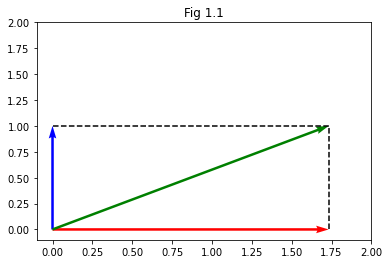

In [46]:
# Plot vectors 
import matplotlib.pyplot as plt
v = np.array([math.sqrt(3),1])
v1 = np.array([math.sqrt(3),0]) # v*
v2 = np.array([0,1])            # v-v*
M = np.array([v1,v2,v])

origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.quiver(*origin, M[:,0], M[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
plt.vlines(math.sqrt(3) ,0 ,1, linestyle="dashed")
plt.hlines(1, 0, math.sqrt(3), linestyle="dashed")
plt.xlim(-0.1, 2)
plt.ylim(-0.1, 2)
plt.title("Fig 1.1")
plt.show()

In [53]:
u1 = np.array([1,0])
print(u1@v2) # Check 0 = <u1,v-v*>
print( v1,' is equal to ', (u1@v)*u1)
print('v* = <u1,v>u1')

0
[1.73205081 0.        ]  is equal to  [1.73205081 0.        ]
v* = <u1,v>u1


In [76]:
alpha = math.sqrt(3)
print('||v-alpha u1||^2 = ',np.linalg.norm(v-3*u1)**2)
print('||v-v*||^2+||(alpha*-alpha)u1||^2= ',np.linalg.norm(v-v1)**2+np.linalg.norm((3-alpha)*u1)**2)

||v-alpha u1||^2 =  2.607695154586736
||v-v*||^2+||(alpha*-alpha)u1||^2=  2.6076951545867364


Thus, we confirmed 
$$||\textbf{v}-\alpha \textbf{u}_1||^2=||\textbf{v}-\textbf{v}^*||^2+||(\alpha^*-\alpha)\textbf{u}_1||^2$$

and therefore $||\textbf{v}-\alpha \textbf{u}_1||^2\geq ||\textbf{v}-\textbf{v}^*||^2$. <br>
That confirms the optimality of $\textbf{v}^*$. The argument in the example above carries through in higher dimension, leading to the following fundamental result.

####Definition 1.2.15 (Orthogonal Projection)<br>
Let $U\subset V$ be a linear subspace with orthonormal basis $\textbf{q}_1,\cdots,\textbf{q}_m$. The orthogonal projection of $\textbf{v}\in V$ on $U$ is defined as $$\mathscr{P}_{\mathscr{U}}\textbf{v}=\sum_{j=1}^m\langle\textbf{v},\textbf{q}_j\rangle\textbf{q}_j$$

####Theorem 1.2.16 (Best Approximation Theorem)<br>
Let $\mathscr{U}\subseteq V$ be a linear subspace with orthonormal basis $\textbf{q}_1,\cdots,\textbf{q}_m$ and let $\textbf{v}\in V$. For any $\textbf{u}\in \mathscr{U}$ $$||\textbf{v}-\mathscr{P}_{\mathscr{U}}\textbf{v}||\leq||\textbf{v}-\textbf{u}||.$$
Furthermore, if $\textbf{u}\in \mathscr{U}$ and the inequality above is an equality, then $\mathscr{U}=\mathscr{P}_{\mathscr{U}}\textbf{v}$.

####Lemma 1.2.17 (Pythagorean theorem)<br>
Letu, $\textbf{u},\textbf{v}\in V$ be orthogonal. Then $||\textbf{u}+\textbf{v}||^2=||\textbf{u}||^2+||\textbf{v}||^2$.

####Lemma 1.2.18 (Cauchy-Schwarz)<br>
For any $\textbf{u},\textbf{v}\in V,|\langle\textbf{u},\textbf{v}\rangle|\leq||\textbf{u}||||\textbf{v}||$.


####Lemma 1.2.19 (Orthogonal Decomposition)<br>
Let $\mathscr{U}\subseteq \textbf{V}$ be a linear subspace with orthonormal basis $\textbf{q}_1,\cdots,\textbf{q}_m$ and let $\textbf{v}\in V$. For any $\textbf{u}\in \mathscr{U}, \langle\textbf{v}-\mathscr{P}_{\mathscr{U}}\textbf{v},\textbf{u}\rangle=0$. In particular, $\textbf{v}$ can be decomposed as $(\textbf{v}-\mathscr{P}_{\mathscr{U}}\textbf{v})+\mathscr{P}_{\mathscr{U}}\textbf{v}$ where the two terms are orthogonal.

### Matrix Powers
There is no symbol for matrix powers that we can use, so we must import the function matrix_power from the subpackage numpy.linalg

In [ ]:
from numpy.linalg import matrix_power as mpow

In [ ]:
M = np.array([[3,4],[-1,5]])
print(M)

[[ 3  4]
 [-1  5]]


In [ ]:
print(mpow(M,2))  # Matrix M to the power 2

[[ 5 32]
 [-8 21]]


In [ ]:
print(M @ M)     # Cheking the result is the same with the multiplication operator

[[ 5 32]
 [-8 21]]


##1.2.3 Eigenvalues and Eigenvectors

####Definition 1.2.20(Eigenvalues and eigenvectors)<br>
Let $A\in \mathbb{R} ^{d×d}$ be a square matrix. Then $\lambda\in \mathbb{R}$ is an eigenvalue of $\textbf{A}$ if there exists a nonzero vector $\textbf{x}\neq \textbf{0}$ such that $\textbf{Ax=λx}$.<br>
The vector $\textbf{x}$ is referred to as an eigenvector.

####Example 1.2.21(No Real Eigenvalues): <br>
Set $d=2$ and let 
$$\textbf{A}=\begin{pmatrix}
0 & -1\\
1&0
\end{pmatrix}$$

For $\lambda$ to be an eigenvalue, there must be an nonzero eigenvector $\textbf{x}=(x_1,x_2)^T$ such that $\textbf{Ax}=\lambda \textbf{x}$ or put differently $−x_2=\lambda x_1$ and $x_1=\lambda x_2$. <br>
Replacing these equations into each other, it must be that $−x_2=\lambda^2x_2$ and $x_1=−\lambda^2x_1$. Because $x_1,x_2$ cannot both be 0, $\lambda$ must satisfy the equation $\lambda^2=-1$ for which there is no real solution.<br>
In general, $A\in\mathbb{R}^{d×d}$ has at most $d$ distinct eigenvalues.

In [ ]:
### Basic matrix operations in Python
M = np.array([[3,4],[-1,5]])
print(M)

#Transpose 
print('Transpose is \n', M.T)

#Inverse
print('Inverse is \n',la.inv(M))

#Trace
print('Trace is \n',np.trace(M))

#Determinant
print('Determinant is \n',la.det(M))



[[ 3  4]
 [-1  5]]
Transpose is 
 [[ 3 -1]
 [ 4  5]]
Inverse is 
 [[ 0.26315789 -0.21052632]
 [ 0.05263158  0.15789474]]
Trace is 
 8
Determinant is 
 19.0


####Lemma 1.2.22 (Number of Eigenvalues):<br>
Let $\textbf{A}\in \mathbb{R}^{d\times d}$ and let $\lambda_1,\cdots,\lambda_m$ be distinct eigenvalues of $\textbf{A}$ with corresponding nonzero eigenvectors $\textbf{x}_1,\cdots,\textbf{x}_m$. Then $\textbf{x}_1,\cdots ,\textbf{x}_m$ are linearly independent. As a result, $m\leq d$. \\

###1.2.3.1 Diagonalization of Symmetric Matrices


####Example 1.2.23 (Diagonal (and Similar) Matrices) <br>
Let $A$ be similar to a matrix $D=\text{diag}(\lambda_1,\cdots,\lambda_d)$ with distinct diagonal entries, that is, there exists an on singular matrix $P$ such that $A=PDP^{−1}$. Let $\textbf{p}_1,\cdots,\textbf{p}_d$ be the columns of $\textbf{P}$. Then $\textbf{AP}=\textbf{PD}$ which implies that $\textbf{Ap}_i=\lambda_i\textbf{p}_i$.

In [88]:
# Diagonalization in Python
M = sympy.Matrix([[3, -2,  4, -2],
            [5,  3, -3, -2],
            [5, -2,  2, -2],
            [5, -2, -3,  3]])
  
print("Matrix : {} ".format(M))
   
# Use sympy.diagonalize() method 
P, D = M.diagonalize()  
      
print("Diagonal of a matrix : {}".format(D))

Matrix : Matrix([[3, -2, 4, -2], [5, 3, -3, -2], [5, -2, 2, -2], [5, -2, -3, 3]]) 
Diagonal of a matrix : Matrix([[-2, 0, 0, 0], [0, 3, 0, 0], [0, 0, 5, 0], [0, 0, 0, 5]])


####Theorem 1.2.24<br>
If $\textbf{A}$ is symmetric, then any two eigenvectors from different eigenspaces are orthogonal.

####Theorem 1.2.25 (The Spectral Theorem for Symmetric Matrices) <br>
An $n\times n$ symmetric matrix $A$ has the following properties:


*   $A$ has $n$ real eigenvalues, counting multiplicities.
*   If $\lambda$ is an eigenvalues of $A$ with multiplicity $k$, then the eigenspace for $\lambda$ is k-dimensional.
*   The eigenspaces are mutually orthogonal, in the sense that eigenvectors corresponding to different eigenvalues are orthogonal.

*  $A$ is orthogonally diagonalizable.

In [83]:
# Symmetric matrices
n = 4
P = np.random.randint(0,10,(n,n))
print(P)
S = P @ P.T
print(S)

[[7 4 8 9]
 [1 3 2 7]
 [9 4 2 0]
 [3 4 5 0]]
[[210  98  95  77]
 [ 98  63  25  25]
 [ 95  25 101  53]
 [ 77  25  53  50]]


In [84]:
# Unpack the eigenvalues and eigenvectors of S
evals, evecs = la.eig(S)
print(evals)

[336.54628873+0.j  66.95400934+0.j   5.36941621+0.j  15.13028572+0.j]


The eigenvalues all have zero imaginary part and so they are indeed real numbers:



In [85]:
evals = evals.real
print(evals)

[336.54628873  66.95400934   5.36941621  15.13028572]


The corresponding eigenvectors of A are:

In [ ]:
print(evecs)

In [86]:
#Check that the eigenvectors are orthogonal to each other:
v1 = evecs[:,0] # First column is the first eigenvector
print(v1)
v2 = evecs[:,1] # Second column is the second eigenvector
print(v2)
print(round(v1 @ v2))

[-0.77648149 -0.34561004 -0.42111    -0.31669632]
[-0.28309616 -0.53051065  0.74982296  0.27600823]
0


The dot product of eigenvectors and 
 is zero and so they are orthogonal!

###1.2.3.2 Constrained Optimization

####Theorem 1.2.26<br>
Let $A$ be $n\times n$ symmetric matrix $A$ with the an orthogonal diagonalization $tA=PDP^{−1}$. The columns of $P$ are orthonormal eigenvectors $\textbf{v}_1,\cdots,\textbf{v}_n$ of $A$. Assume that the diagonal of $D$ are arranged so that $\lambda_1\leq\lambda_2,\cdots\leq\lambda_n$. Then $$\min_{x\neq 0}\frac{\textbf{x}^TA\textbf{x}}{\textbf{x}^T\textbf{x}}=\lambda_1$$ is achieved when $\textbf{x}=\textbf{v}_1$ and  $$\min_{x\neq 0}\frac{\textbf{x}^TA\textbf{x}}{\textbf{x}^T\textbf{x}}=\lambda_n$$ is achieved when $\textbf{x}=\textbf{v}_n$.

### Eigenvalues and Eigenvectors
The numpy.linalg.eig function returns a tuple consisting of a vector and an array. The vector contains the eigenvalues. The array contains the corresponding eigenvectors, one eigenvector per column. The eigenvectors are normalized so their Euclidean norms are 1.

In [ ]:
D = np.array([[1,2,3],[3,2,1],[1,0,-1]])
lam, v = la.eig(D)
print(lam)
print(v)

Let's check if the eigenvalue/eigenvector condition holds:
## $$Av = \lambda v$$

In [ ]:
print(D*v)
print(lam*v)

### Solving Linear Systems
Let's try to solve the following system of equations:

\begin{align}
4x + 3y + 2z &= 25\\
-2x + 2y + 3z &= -10\\
3x -5y + 2z &= -4
\end{align}

To solve a system of linear equations, we need to find the values of the $x$ and $y$ variables. There are multiple ways to solve such a system, such as Elimination of Variables, Cramer's Rule, Row Reduction Technique, and the Matrix Solution. We will use the matrix solution. In the matrix solution, the system of linear equations to be solved is represented in the form of matrix: 

$$ AX = B $$

So, we can represent the linear system in the form of matrix as follows:

\begin{align}
\begin{pmatrix}
4 & 3 & 2\\ 
-2 & 2 & 3\\
3 & -5 & 2
\end{pmatrix}
\begin{pmatrix}
x\\ 
y\\
z
\end{pmatrix} =
\begin{pmatrix}
25\\ 
-10\\
4
\end{pmatrix}
\end{align}

In [ ]:
A = np.array([[4,3,2],[-2,2,3],[3,-5,2]])
B = np.array([25,-10,-4])
X = np.linalg.solve(A,B)
print(X)